<a href="https://colab.research.google.com/github/ZacharyFry1/DD-Science-Cohort15/blob/main/Copy_of_Project_6_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6 - Neural Networks and Deep Learning

## Problem Definition


The objective of this project is to develop a deep learning algorithm that can correctly classify a picture as a dog or a cat. Because there is a target, this is considered a supervised learning problem, and because the targets are categorical, it will be a classification problem. We want to classify the images as either cats or dogs.

## Data Collection


Import matplotlib, numpy, pandas and a keras model.

In [ ]:
import numpy as np
import pandas as pd
import pickle
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
from PIL import Image
import requests
import io

URLs for the X and Y data and the test image.

In [ ]:
url_1 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'

url_2 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

url_3 = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

Reading in the data as pickle data.

In [ ]:
x_pickle_data = pd.read_pickle('https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle')

In [ ]:
y_pickle_data = pd.read_pickle('https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle')

In [ ]:
y_pickle_data = np.array(y_pickle_data)

## Data Cleaning


Scaling the X data to make the values in between 0 and 1 by dividing by 255.

In [ ]:
x_pickle_data_scaled = x_pickle_data/255

In [ ]:
x_pickle_data.shape

(24946, 100, 100, 1)

In [ ]:
x_pickle_data_scaled.shape

(24946, 100, 100, 1)

## Exploratory Data Analysis


### Random Samples

Random samples for testing the data. Commented out when not in use.

In [ ]:
# num_images = x_pickle_data_scaled.shape[0]

In [ ]:
# random_indices = random.sample(range(num_images), 1000)

In [ ]:
# x_subset_images = x_pickle_data_scaled[random_indices]

In [ ]:
# y_subset = [y_pickle_data[i] for i in random_indices]

In [ ]:
# y_subset = np.array(y_subset)

In [ ]:
# x_subset_images.shape

Making X and y data. X are images. Y are the values associated with the images.

In [ ]:
y = y_pickle_data

In [ ]:
X = x_pickle_data_scaled

Plotting the first five images from the data.

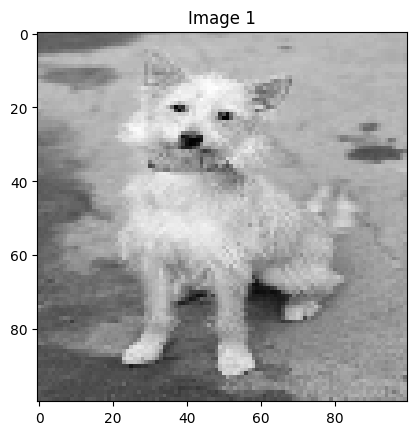

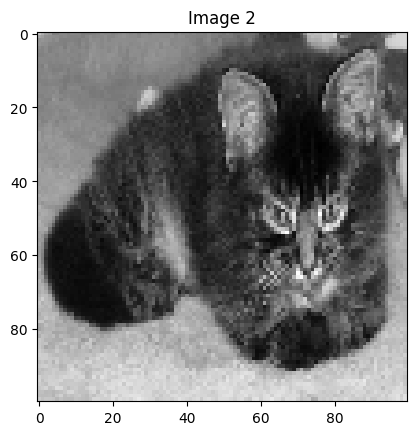

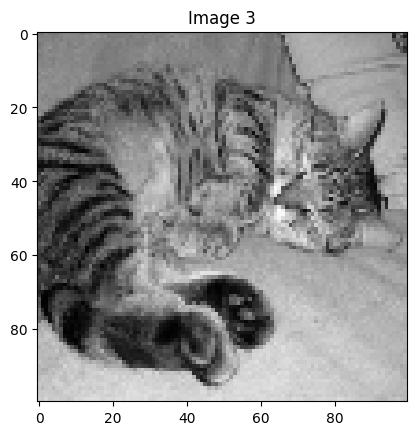

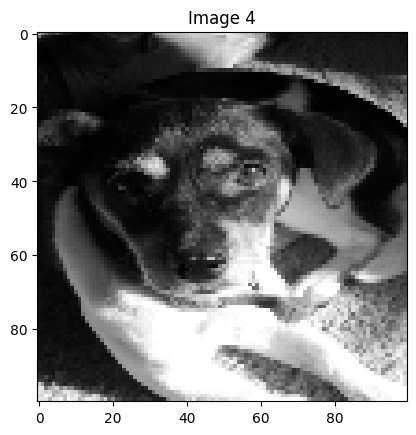

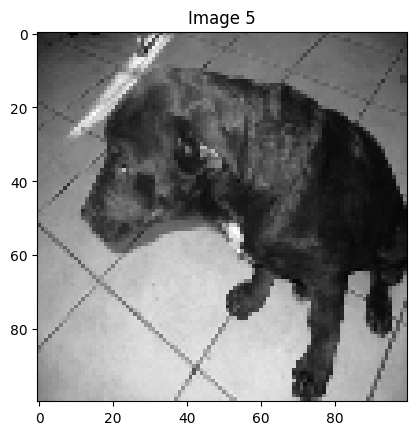

In [ ]:
for i in range(5):
  plt.imshow(X[i].squeeze(), cmap = 'gray')
  plt.title(f"Image {i+1}")
  plt.show()

In [ ]:
print(y[0])
print(y[1])
print(y[2])
print(y[3])
print(y[4])

0
1
1
0
0


## Data Processing


### Train, Test Split

Performing a train, test split.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [ ]:
(type(X_train),
type(X_test),
type(y_train),
type(y_test),)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
X_train.shape

(18709, 100, 100, 1)

In [ ]:
X_train.shape[1:]

(100, 100, 1)

In [ ]:
X_test.shape

(6237, 100, 100, 1)

### Defining Keras Model

In [ ]:
model = Sequential()

First input layer in the model. Using a standard relu activation and a kernel size of (3,3).

In [ ]:
#Input layer
model.add(
  Conv2D(
    name = "input1",
    input_shape = X_train.shape[1:],
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Second hidden layer of the model. Using the same parameters as above.

In [ ]:
# Define second hidden layer
model.add(
  Conv2D(
    name = "hidden1",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
  MaxPooling2D(pool_size=(2,2))
)

This is the output layer. We are using a sigmoid function, and 1 unit because this is a binary classification problem.

In [ ]:
model.add(
    Flatten()
)


model.add(
  Dense(
    name = "Output2",
    units = 1,
    activation = 'sigmoid',
  )
)

### Compile Model

Optimizing the model to predict binary classifcation data.

In [ ]:
# Using binary cross entropy loss function and accuracy as metric since we are doing a binary prediction
model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['accuracy']
)

### Fitting Model

Fitting the model. 12 epochs used.

In [ ]:
model.fit(X_train, np.array(y_train), epochs=12) ;

Epoch 1/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5738 - loss: 0.6755
Epoch 2/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6888 - loss: 0.5889
Epoch 3/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7726 - loss: 0.4773
Epoch 4/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7989 - loss: 0.4434
Epoch 5/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8196 - loss: 0.3970
Epoch 6/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8474 - loss: 0.3507
Epoch 7/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8597 - loss: 0.3264
Epoch 8/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8773 - loss: 0.2912
Epoch 9/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8889 - loss: 0.2665
Epoch 10/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9053 - loss: 0.2350
Epoch 11/12
585/585 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9221 - loss: 0.2040
Epoch 12/12
585/585 ━━━━━━━━━━━━━━━

Summary of the model.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input1 (Conv2D)                      │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Conv2D)                     │ (None, 47, 47, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output2 (Dense)                      │ (None, 1)                   │          33,857 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 214,277 (837.02 KB)

 Trainable params: 71,425 (279.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,852 (558.02 KB)

Plotting the model.

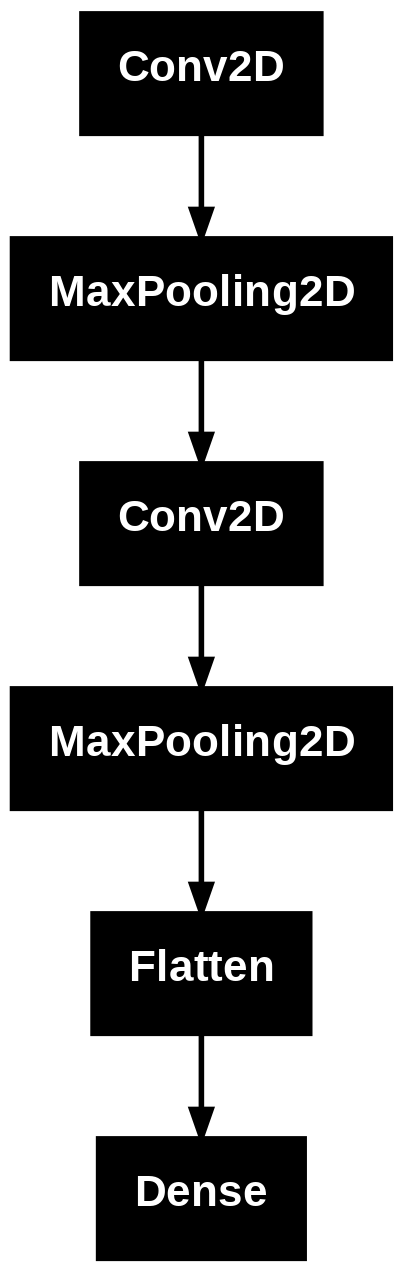

In [ ]:
plot_model(model)

### Evaluate the Model

Evaluating the model on our testing data sets.

In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)
val_acc

195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7777 - loss: 0.5853


0.780663788318634

### Prediction

In [ ]:
predictions = model.predict(X_test)
print(predictions[100])

195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[0.13675748]


In [ ]:
y_test[100]

0

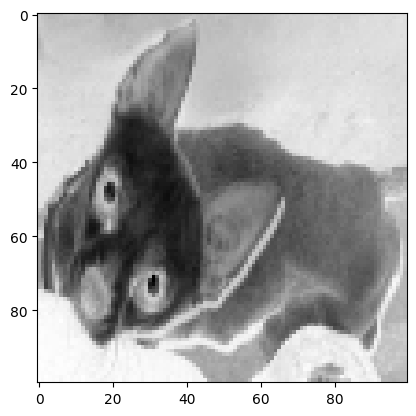

In [ ]:
plt.imshow(X_test[100], cmap=plt.cm.gray_r)
plt.show()

#### Distrobution of Probabilities

The frequency of getting a 0 or a 1. Because the model is designed to select for a 0 or 1, the number of times it predicts these two numbers is higher than the other probabilities.

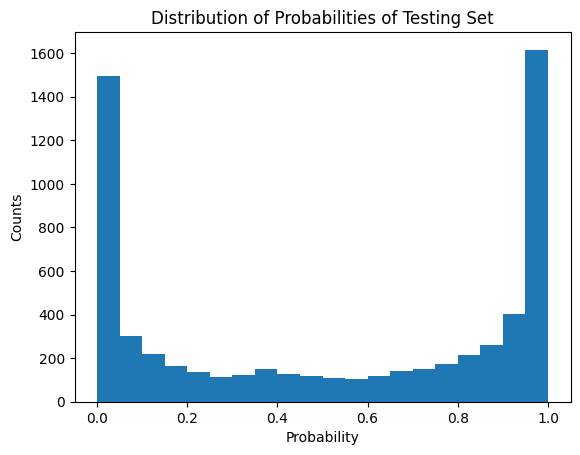

In [ ]:
plt.hist(predictions, bins = 20)
plt.title('Distribution of Probabilities of Testing Set')
plt.xlabel('Probability')
plt.ylabel('Counts')
plt.show()

### Read In Image Function

The function below reads in an image from a url and turns it into a numpy array.

In [ ]:
def read_image_from_url(url):
  """Reads a JPEG image from a URL and converts it to a NumPy array.

  Args:
    url: The URL of the image.

  Returns:
    A NumPy array representing the image.
  """
  response = requests.get(url, stream=True)
  response.raise_for_status()  # Raise an exception for bad status codes
  image = Image.open(io.BytesIO(response.content)).convert('RGB')
  image_np = np.array(image)
  return image_np

### 4D Function

The function below takes the image read in from the function above and changes its size and shape to be compatible with the Keras model.

In [ ]:
def four_dimensional_function_2(image):
  """
    Takes an image and transforms it to a specific format for my model.

    Args:
      image: The input image.

    Returns: The jpeg image reformatted to fit into my model above.
  """
  # Convert the PIL Image to a NumPy array. Has to be an array for it to be resized.
  image_np = np.array(image)

  # Resize the image to 100x100 using Pillow's resize function. Making it a compatible size for it to be reshaped.
  resized_image = image.resize((100, 100))

  # Convert the resized image back to a NumPy array. Converting back into an array to be reshaped.
  image_np = np.array(resized_image)

  # Now reshape if necessary (if the model requires a specific shape). Reshaping it for the model.
  image_np = np.reshape(image_np, newshape=(1, 100, 100, 1), order='A')

  return image_np # Return the NumPy array

### Converting Image to Gray Scale

Pulling in the image using my function.

In [ ]:
test_image = read_image_from_url(url_3)

Converting the image to gray scale.

In [ ]:
test_image_gray = Image.fromarray(test_image).convert('L')


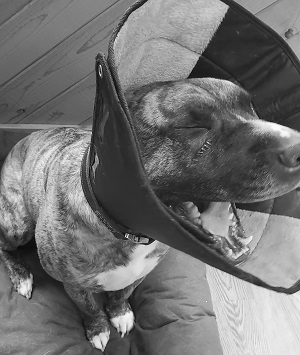

In [ ]:
test_image_gray

Reshaping the test image of the dog.

In [ ]:
image_for_model = four_dimensional_function_2(test_image_gray)

### Predicting Sample Image

Predicting whether its a 0 or a 1.

In [ ]:
prediction1 = model.predict(image_for_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


The model predicts a 0.

In [ ]:
prediction1

array([[9.918113e-08]], dtype=float32)

Filtering the one data point above a 0.5 threshold. Greater than 0.5 counts the image as a cat.

In [ ]:
filter = ( prediction1 > 0.5 )
filter[:10]

array([[False]])

0 is predicted for the image. This makes sense given it is a dog.

In [ ]:
class_pred = filter.astype("int32")
class_pred[0]

array([0], dtype=int32)

## Communication of Results


The model was good at predicting the image of the dog that wasn't in the training or testing data. It was able to accurately predict the image of the dog most of the time, despite different filters and kernel sizes being used. We would expect the model to predict a 0 for the value of dog image I uploaded at the end, because in the original y data, dogs are 0 and cats are 1. The model tended to generate a significantly higher accuracy and lower loss when it was fitted than when it was evaluated against test data. This is likely due to the overfitting of the model, thus it underperforms when evaluating it and predicting the values of new images it did not train on. The nodes did not affect the model significantly, but the highest accuracy models were generated with 64 nodes. 4 nodes did negatively impact the model accuracy and the model generated with 4 nodes consistently guessed the image of the dog incorrectly. Kernel sizes of (1,1) and (9,9) performed poor when generated a model, while kernel size of (3,3) produced the highest accuracy of the model. This is because it allows the nueral network to generate meaningful patterns with a small number of parameters. Despite this only kernel size of (1,1) showed consistently poor results at predicting the value of the image of the dog.


Summary of Node Tests Run (Kernel Size (3,3)):


*   128 Node Model:
Fitting Model:
Accuracy  = 0.9144, loss = 0.2184
Evaluating Model:
Accuracy = 0.7713, loss = 0.5430

*  64 Node Model:
Fitting Model:
Accuracy  = 0.9435, loss = 0.1541
Evaluating Model:
Accuracy = 0.7883, loss = 0.6293



*  32 Node Model:
Fitting Model:
Accuracy  = 0.9020, loss = 0.2388
Evaluating Model:
Accuracy = 0.7896, loss = 0.4914


*  4 Node Model:
Fitting Model:
Accuracy  = 0.7751, loss = 0.4796
Evaluating Model:
Accuracy = 0.7451, loss = 0.5430


Summary of Kernel Size Test Runs (64 Nodes):

*   Kernel Size (9,9):
Fitting Model:
Accuracy = 0.8224, loss = 0.3874
Evaluating Model:
Accuracy = 0.7304, loss = 0.3874

*   Kernel Size (5,5):
Fitting Model:
Accuracy = 0.9045, loss = 0.2323
Evaluating Model:
Accuracy = 0.7776, loss = 0.5720

*   Kernel Size (3,3):
Fitting Model:
Accuracy = 0.9382, loss = 0.1645
Evaluating Model:
Accuracy = 0.7948, loss = 0.5819

*   Kernel Size (1,1):
Fitting Model:
Accuracy = 0.6630, loss = 0.6180
Evaluating Model:
Accuracy = 0.6492, loss = 0.63





## **BONUS** (optional)



* Upload an image of your (or your friend's or family's) dog or cat and use your model to predict whether the image is a dog or cat.
* Hint: you'll probably need to convert the image from color to grayscale.  OpenCV, pillow, and other libraries are your friend.